<a href="https://colab.research.google.com/github/nishantkaundal18/Water-Quality-Predicision-Using-ANN-model-and-Decision-t-Tree/blob/main/water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

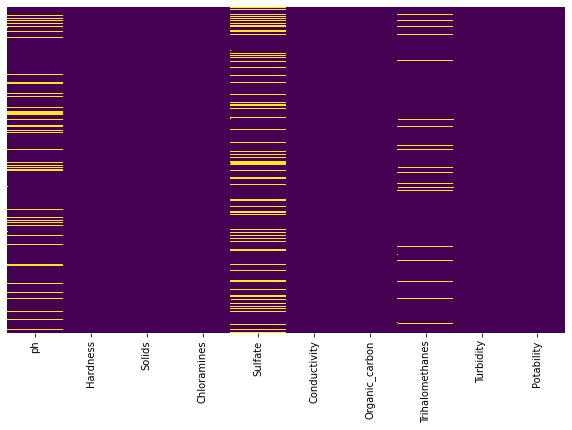

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = "mean")
df[["ph", "Sulfate", "Trihalomethanes"]] = si.fit_transform(df[["ph", "Sulfate", "Trihalomethanes"]])

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


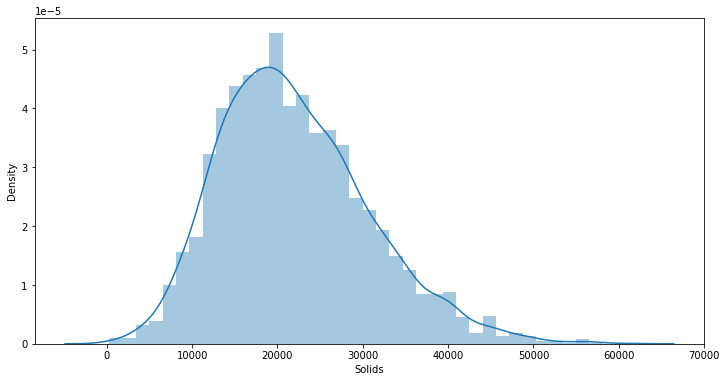

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(df["Solids"])
     

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
colname = x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:

x = pd.DataFrame(x, columns=colname)
print(f"X shape : {x.shape}, Y Shape : {y.shape}")

X shape : (3276, 9), Y Shape : (3276,)


In [ ]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=100, stratify=y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
#ann model
ann = Sequential()

ann.add(Dense(units = 32, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 16, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 8, activation = "relu"))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units = 8, activation = "relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units = 1, activation = "sigmoid"))

ann.compile(optimizer = "adam", loss="binary_crossentropy")
     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop], verbose=1)

Epoch 1/600
82/82 [==============================] - 1s 4ms/step - loss: 0.7723 - val_loss: 0.6785
Epoch 2/600
82/82 [==============================] - 0s 3ms/step - loss: 0.7030 - val_loss: 0.6759
Epoch 3/600
82/82 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6737
Epoch 4/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6860 - val_loss: 0.6729
Epoch 5/600
82/82 [==============================] - 0s 2ms/step - loss: 0.6775 - val_loss: 0.6710
Epoch 6/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6771 - val_loss: 0.6707
Epoch 7/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6715 - val_loss: 0.6701
Epoch 8/600
82/82 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.6697
Epoch 9/600
82/82 [==============================] - 0s 2ms/step - loss: 0.6756 - val_loss: 0.6695
Epoch 10/600
82/82 [==============================] - 0s 3ms/step - loss: 0.6716 - val_loss: 0.6692
Epoch 11/

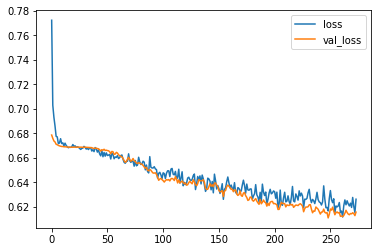

In [ ]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5

21/21 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       400
           1       0.79      0.21      0.33       256

    accuracy                           0.67       656
   macro avg       0.73      0.59      0.56       656
weighted avg       0.71      0.67      0.61       656



In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
new = [[8.2, 139, 21000, 8.6, 318, 420, 14, 72, 4.05]]
anc = sc.transform(new)
ypred = ann.predict(anc)
if (ypred>0.5):
  print("This Water is suitable for drinking")
else:
    print("This Water is not suitable for drinking")

1/1 [==============================] - 0s 16ms/step
This Water is suitable for drinking


In [ ]:
#Train Decision Tree Classifier
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 40, splitter= 'best')
dt.fit(X_train,Y_train)


DecisionTreeClassifier(min_samples_split=40)

In [ ]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Accuracy Score = 60.97560975609756
Confusion Matrix =
 [[288 114]
 [142 112]]
Classification Report =
               precision    recall  f1-score   support

           0       0.67      0.72      0.69       402
           1       0.50      0.44      0.47       254

    accuracy                           0.61       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.61      0.60       656



In [ ]:
res = dt.predict([[6.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320]])[0]
res
if res==1:
       print("Water is safe for drinking")
elif res==0:
       print("Water is not safe for drinking") 

Water is safe for drinking
